# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

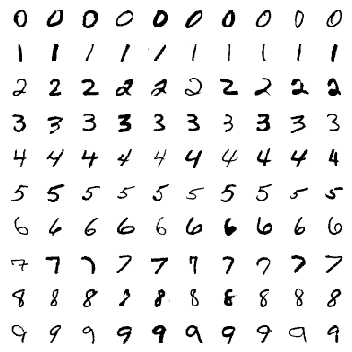

In [3]:
def P1(num_examples=10):

### STUDENT START ###
    digits = np.unique(Y)
    fig, axes = plt.subplots(num_examples, num_examples, figsize = (5,5))
    plt.rc("image",cmap="Greys")
    for i, digit in enumerate(digits):
        for j in range(10):
            sample = mini_train_data[mini_train_labels == digit][j].reshape((28,28))
            axes[i,j].imshow(sample)
            axes[i,j].axis("off")
    plt.tight_layout()
    plt.show()

### STUDENT END ###

P1(10)

### Part 2:

Produce k-Nearest-Neighbors model with k = [1,3,5,7,9].  Evaluate and show teh performance of each model. For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label. Which is the most difficult digit?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [4]:
def P2(k_values):

### STUDENT START ###
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
        knn.fit(mini_train_data, mini_train_labels) 
        y_test = dev_labels
        y_pred = knn.predict(dev_data)
        print("k = %s" %k)
        print("Accuracy:" +str(knn.score(dev_data,dev_labels)) + "\n")
        if k == 1:
            print('\n Classification report for k=1:\n', classification_report(y_test, y_pred))
            
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

k = 1
Accuracy:0.884


 Classification report for k=1:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

k = 3
Accuracy:0.876

k = 5
Accuracy:0.882

k = 7
Accuracy:0.877

k = 9
Accuracy:0.875



ANSWER: The most difficult digit for the model to recognize depends on how you're specifying recognition. If you care about true positives and just correctness, then precision would be the metric that you would look at. "9" has the lowest precision score so it is the number with the least amount of correctness with respect to true positives. It has a lot of false positives. If you care about false negatives, then recall would be the metric you would look at. Recall minimizes the chance of false negatives. "8" has the lowest recall which means there's a lot of false negatives for "8".

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on the train set.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [5]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    for size in train_sizes:
        start_time = time.time()
        knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
        knn.fit(train_data[0:size], train_labels[0:size])
        end_time = time.time()
        measure_time = end_time - start_time #records the time needed to measure performace of model
        accuracy = knn.score(dev_data,dev_labels)
        print("Training size:" + "%s" %size)
        print("Accuracy:" + str(accuracy))
        print("Measure Time:" + str(measure_time) + "\n")
        accuracies.append(accuracy)

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

Training size:100
Accuracy:0.702
Measure Time:0.0017189979553222656

Training size:200
Accuracy:0.791
Measure Time:0.0025038719177246094

Training size:400
Accuracy:0.811
Measure Time:0.00518488883972168

Training size:800
Accuracy:0.866
Measure Time:0.012881040573120117

Training size:1600
Accuracy:0.905
Measure Time:0.033410072326660156

Training size:3200
Accuracy:0.927
Measure Time:0.09763979911804199

Training size:6400
Accuracy:0.939
Measure Time:0.29979896545410156

Training size:12800
Accuracy:0.952
Measure Time:1.1634178161621094

Training size:25600
Accuracy:0.963
Measure Time:3.294545888900757



### Part 4:

Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.  What's wrong with using regression here?

Apply some transformation that makes the predictions more reasonable.  Show $R^2$ of the improved regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.

Notes:
* Train the regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.

Accuracies for Training Set Sizes [60000, 120000, 1000000]: 

No Transformation Accuracies:
[[1.2361731707874237, 1.637428053637104, 7.522499668765751]]

𝑅2:0.4177006634161019

Transform Input Accuracies:
[[1.0335879166434623], [1.0643212499767958], [1.1583312493537086]]

𝑅2:0.9068304252436642

Transform Output Accuracies:
[0.9832927097569462, 0.9911143865080189, 0.9988704258725941]

𝑅2:0.8649045423180002

Transform Both Accuracies:
[0.9630701660900399, 0.9665919573218424, 0.9741365674202281]

𝑅2:0.9395242859897991



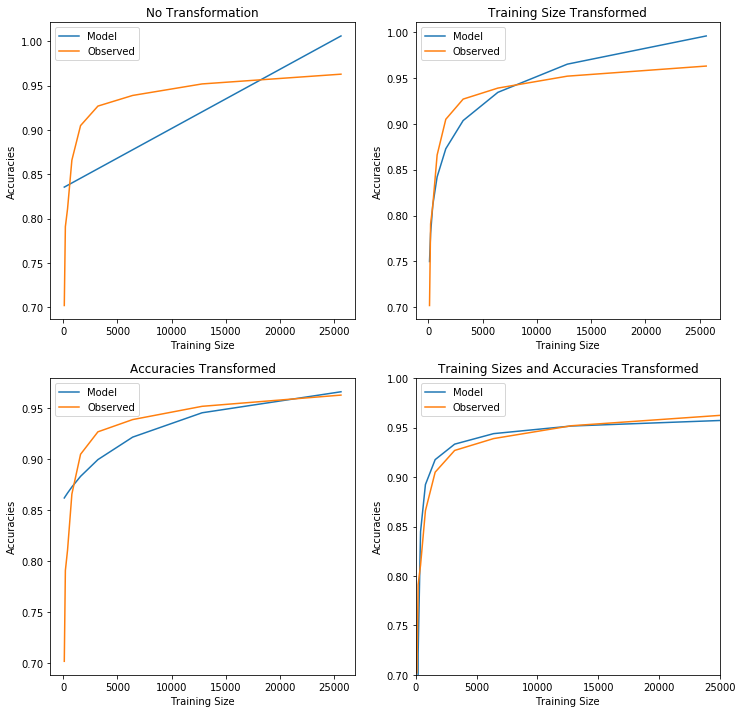

In [6]:
def P4():

### STUDENT START ###
    #Variables to Implement Graphs
    new_sizes = np.array([60000,120000,1000000]).reshape(-1,1)#new larger training sizes
    x_sizes = np.array(train_sizes).reshape(-1,1) #training sizes from Q3 
    y_accuracies = np.array(accuracies).reshape(-1,1) #accuracies of training sizes from Q3
    x_logsizes = np.log(x_sizes) #logs of training sizes from Q3
    new_logsizes = np.log(new_sizes) #logs of new larger training sizes
    prob_to_odds = lambda x: x/(1.0 - x) #converts probabilities to odds
    odds_to_probs = lambda x:x/(1.0+x) #converts odds to probabilities
    y_oddsaccuracies = np.array(list(map(prob_to_odds,accuracies))) #accuracies from Q3 converted into odds
    fig = plt.figure(figsize=(12, 12)) #Initializing size of subplots
    print("Accuracies for Training Set Sizes [60000, 120000, 1000000]: \n")

    #Graph with No Transformations
    lm = LinearRegression(fit_intercept = True)
    lm.fit(x_sizes, y_accuracies)
    lm_yhat = lm.predict(x_sizes)#predict accuracies of original training sizes
    a1 = fig.add_subplot(2,2,1)
    a1.plot(x_sizes, lm_yhat, label="Model")
    plt.plot(x_sizes,accuracies,label="Observed")
    a1.set_xlabel('Training Size')
    a1.set_ylabel('Accuracies')
    a1.set_title('No Transformation')
    a1.legend()
    no_transform_accuracies = lm.predict(new_sizes).reshape(1,-1).tolist() #predict accuracies of new training sizes
    print("No Transformation Accuracies:\n" + str(no_transform_accuracies) + "\n")
    print("𝑅2:" + str(lm.score(x_sizes,y_accuracies)) + "\n")

    #Graph with training sizes transformed by taking logs
    lm2 = LinearRegression(fit_intercept = True)
    lm2.fit(x_logsizes,y_accuracies)
    lm2_yhat = lm2.predict(x_logsizes)#predict accuracies of original training sizes
    a2 = fig.add_subplot(2,2,2)
    a2.plot(x_sizes,lm2_yhat, label="Model")
    a2.plot(x_sizes,y_accuracies, label="Observed")
    a2.set_xlabel('Training Size')
    a2.set_ylabel('Accuracies')
    a2.set_title('Training Size Transformed')
    a2.legend()
    transform_input_accuracies = lm2.predict(new_logsizes) #predict accuracies of new training sizes
    print("Transform Input Accuracies:\n" + str(transform_input_accuracies.tolist()) + "\n")
    print("𝑅2:" + str(lm2.score(x_logsizes,y_accuracies)) + "\n") 

    #Graph with accuracies transformed by turning probabilities into odds
    lm3 = LinearRegression(fit_intercept = True)
    lm3.fit(x_sizes,y_oddsaccuracies)
    lm3_yhat = lm3.predict(x_sizes)#predict accuracies of original training sizes
    lm3_yhat_probabilities = list(map(odds_to_probs,lm3_yhat))#convert predicted accuracies to probabilities
    a3 = fig.add_subplot(2,2,3)
    a3.plot(x_sizes,lm3_yhat_probabilities, label="Model")
    a3.plot(x_sizes,y_accuracies, label="Observed")
    a3.set_xlabel('Training Size')
    a3.set_ylabel('Accuracies')
    a3.set_title('Accuracies Transformed')
    a3.legend()
    transform_output_accuracies = lm3.predict(new_sizes) #predict accuracies of new training sizes
    probability_output = list(map(odds_to_probs,transform_output_accuracies)) #convert new accuracies to probabilities
    print("Transform Output Accuracies:\n" + str(probability_output) + "\n") 
    print("𝑅2:" + str(lm3.score(x_sizes,y_oddsaccuracies)) + "\n")

    #Graph with both training sizes and accuracies transformed
    lm4 = LinearRegression(fit_intercept = True)
    lm4.fit(x_logsizes, y_oddsaccuracies)
    lm4_yhat = lm4.predict(x_logsizes) #predict accuracies of original training sizes
    lm4_probabilities = list(map(odds_to_probs,lm4_yhat)) #convert predicted accuracies to probabilities
    a4 = fig.add_subplot(2,2,4)
    a4.plot(x_sizes,lm4_probabilities, label="Model")
    a4.plot(x_sizes,y_accuracies, label="Observed")
    a4.set_xlabel('Training Size')
    a4.set_ylabel('Accuracies')
    a4.set_title('Training Sizes and Accuracies Transformed')
    a4.set_xlim([0,25000])
    a4.set_ylim([0.7,1])
    a4.legend()
    transform_both = lm4.predict(new_logsizes) #predict accuracies of new training sizes
    probability_both = list(map(odds_to_probs,transform_both)) #convert new accuracies to probabilities
    print("Transform Both Accuracies:\n" + str(probability_both) +"\n")
    print("𝑅2:" + str(lm4.score(x_logsizes,y_oddsaccuracies)) + "\n")

### STUDENT END ###

P4() 

ANSWER: Without transformations, the probabilities of the larger data sets are larger than one. This is not possible. Probabilities can not be larger than one. Transformations are needed to make the probabilities stay within the range of (0,1). Taking the logs of training sizes and predicting and transforming the accuracies to odds before fitting a linear model (graph 4) yields the highest r^2 value out of the linear regressions.

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


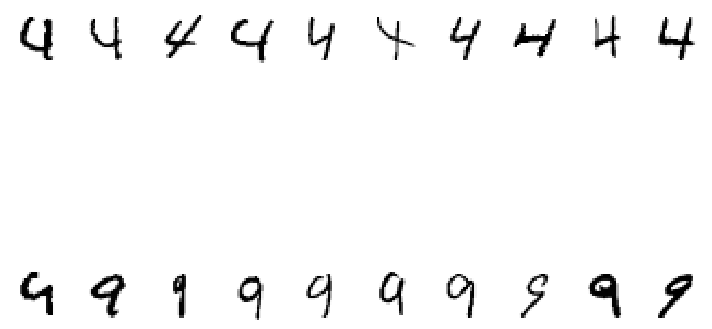

In [7]:
def P5():

### STUDENT START ###
    knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
    knn.fit(mini_train_data, mini_train_labels)
    y_pred = knn.predict(dev_data)
    y_test = dev_labels
    conf_matrix = confusion_matrix(y_test, y_pred) 
    print(conf_matrix)

    confuse_digits = np.array(['4','9']) #filter to get most confused digits
    fig, axes = plt.subplots(2,10, figsize = (10,10))
    plt.rc("image",cmap="Greys")
    for i, digit in enumerate(confuse_digits):
        for j in range(10):
            image = dev_data[dev_labels == digit][j].reshape((28,28))
            axes[i,j].imshow(image)
            axes[i,j].axis("off")
    plt.tight_layout()
    plt.show()

    
### STUDENT END ###

P5()

ANSWER: According to the confusion matrix, 9s are most often confused for 4s. In other words, there are lots of 9s that are actually 4s which means that 9 has a lot of false positives and thus a low precision rate. Furthermore, 8 has the lowest true positives out of all the digits and many false negatives which is why it has such a low recall rate, as was mentioned in part 1.

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Apply your blur filter in 3 ways:
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracy resulting no filter and from each way you apply the filter.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [8]:
def P6():
    
### STUDENT START ###
    def gauss_filter(data):
        '''Takes in data and applies a gaussian filter. This filter puts each pixel in the middle of a 3x3 square,
           sums all of the values, and divides the values by 9. The function pads all sides of the data - 
           additional row on top and bottom and additional column on left and right - so that corners and edges of 
           matrix can be the center of a 3x3 matrix. Padding increases accuracy of the filter.
        '''
        gauss_train = []
        filter_gauss = 1/9 * np.ones((3,3)) #filter
        for row in range(len(data)):
            no_blur = data[row].reshape((28,28))
            padded_no_blur = np.pad(no_blur,(1,1),'edge')#pads the data 
            gauss_blur = np.zeros((28,28))
            for j, row in enumerate(no_blur,1):
                for k, column in enumerate(row,1):
                    gauss_blur[j-1,k-1] = np.sum(padded_no_blur[j-1:j+2,k-1:k+2] * filter_gauss)                   
            gauss_train.append(gauss_blur)
        return np.array(gauss_train).reshape((1000, 784))
    def print_accuracy(train_data,train_label,test_data,test_label,string):
        '''Takes in training and test data and their labels, runs 1-Nearest Neighbor model on the data, and prints
           the accuracy of the model with the given string parameter to label the accuracy.
        '''
        knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
        knn.fit(train_data,train_label)
        accuracy = knn.score(test_data,test_label)
        print(string + str(accuracy))

    mini_train_blur = gauss_filter(mini_train_data) #applies filter to mini_train_data
    dev_blur = gauss_filter(dev_data) #applies filter to dev_data

    print_accuracy(mini_train_data,mini_train_labels,dev_data,dev_labels, "No Blur Accuracy:")
    print_accuracy(mini_train_blur,mini_train_labels,dev_blur,dev_labels, "Both Blur Accuracy:")
    print_accuracy(mini_train_blur,mini_train_labels,dev_data,dev_labels,"Training Blur Accuracy:")
    print_accuracy(mini_train_data,mini_train_labels,dev_blur,dev_labels, "Dev Blur Accuracy:")



### STUDENT END ###

P6()

No Blur Accuracy:0.884
Both Blur Accuracy:0.905
Training Blur Accuracy:0.907
Dev Blur Accuracy:0.868


### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter.  Use some reasonable threshold to separate white from black.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data.  Use some reasonable thresholds to separate white from gray from black.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [9]:
def P7():

### STUDENT START ###
    mean_data = np.mean(mini_train_data)
    percentile = np.percentile(mini_train_data,99)
    print("Mean of data: " + str(mean_data))
    print("90th Percentile: " +str(percentile))
    
    
    bnb = BernoulliNB(binarize = 0.1) #binarize using 0.1 for Bernoulli model since 0.1 is mean of data
    bnb.fit(mini_train_data,mini_train_labels)
    print('Bernoulli Model Prediction Accuracy: %3.2f' % bnb.score(dev_data, dev_labels))
    
    #split data at 0.1,0.9, and greater than 0.9. The 90th percentile of the data is 0.996. 
    mnb_mini_train_data = np.where(mini_train_data <= 0.1, 0,
                               np.where(mini_train_data <= 0.9, 1, 2)) 
    
    mnb = MultinomialNB()
    mnb.fit(mnb_mini_train_data,mini_train_labels)
    print('Multinmoial Model Prediction Accuracy: %3.2f' % mnb.score(dev_data, dev_labels))
    
### STUDENT END ###

P7()

Mean of data: 0.1321254651860744
90th Percentile: 0.996078431372549
Bernoulli Model Prediction Accuracy: 0.81
Multinmoial Model Prediction Accuracy: 0.81


ANSWER: The multinomial model does not appear to improve the results for this model. This is most likely because this data is more suitable for a bernoulli model since most of the values are either very close to 0 or very close to 1. So, the multinomial model is about as accurate as the Bernoulli model for this data.

### Part 8:

Search across several values for the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Train on the mini train set.
* Vary alpha and evaulate performance using `GridSearchCV` to cross-validate.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [10]:
def P8(alphas):

### STUDENT START ###
    grid_search = GridSearchCV(BernoulliNB(), param_grid = alphas, scoring = "accuracy", cv = 5)
    grid_results = grid_search.fit(mini_train_data,mini_train_labels)# running the grid search
    print("Accuracies: " +str(grid_results.cv_results_['mean_test_score'])) #returning mean accuracies for each alpha
    return grid_results

### STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print()
print("Best alpha = ", nb.best_params_)

Accuracies: [0.814 0.819 0.825 0.822 0.818 0.813 0.809 0.805 0.783]

Best alpha =  {'alpha': 0.001}


ANSWER: The best value for alpha is 0.001. The accuracy when alpha is near zero is close to the accuracy of the Bernoulli Model with a default value of alpha = 1, 0.81. This is because increasing alpha increases the accuracy but only to a certain extent; when alpha becomes too large, we distort the data too much and the accuracy decreases. When alpha is 0, we run the risk of the conditional probabilities becoming zero if we encounter a feature that was not present in the training set. Thus, an alpha of zero in this case has a similar value of an alpha value of 1. The highest accuracy comes from an alpha value of 0.001.

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [11]:
def P9():

### STUDENT END ###

    #Gaussiann Without Fixes
    gnb = GaussianNB()
    gnb.fit(mini_train_data,mini_train_labels)
    accuracy = gnb.score(dev_data,dev_labels)
    print("No Fix Gaussian: " + str(accuracy))

    #Fixing Gaussian via Var_smoothing
    gnb_fix = GaussianNB(var_smoothing = 0.06)
    gnb_fix.fit(mini_train_data, mini_train_labels)
    fix_accuracy = gnb_fix.score(dev_data,dev_labels)
    print("Gaussian with Var_Smoothing: " + str(fix_accuracy))

    #Fixing Gaussian via Changing Sigma
    gnb_change_sigma = GaussianNB()
    gnb_change_sigma.fit(mini_train_data,mini_train_labels)
    gnb_change_sigma.sigma_[:] = gnb_change_sigma.sigma_.mean()
    gnb_change_sigma_accuracy = gnb_change_sigma.score(dev_data,dev_labels)
    print("Gaussian with Changed Sigma: " + str(gnb_change_sigma_accuracy))
    
    #Fixing Gaussing via Changing Theta
    gnb_change_theta = GaussianNB()
    gnb_change_theta.fit(mini_train_data,mini_train_labels)
    gnb_change_theta.theta_[:] = gnb_change_theta.theta_.mean()
    gnb_change_theta_accuracy = gnb_change_theta.score(dev_data,dev_labels)
    print("Gaussian with Changed Theta: " + str(gnb_change_theta_accuracy))

### STUDENT END ###

P9()

No Fix Gaussian: 0.593
Gaussian with Var_Smoothing: 0.821
Gaussian with Changed Sigma: 0.803
Gaussian with Changed Theta: 0.177


ANSWER: In order to increase the accuracy of the Gaussian Naive Bayes model on this data, I tried changing the var_smoothing parameter, theta, and sigma. Each yielded different results. Changing var_smoothing to 0.06 yielded the highest accuracy of 0.82. Var_smoothing adds a portion of the largest variance of the features to the variances of the features. In other words, var_smoothing increases the variance of the features and widens the distribution curve which allows more samples away from the mean to be weighted and factored in the model more. Our data is not centered around the mean values of the pixels,0.1. Most values are close to 0 or close to 1 so our data does not truly represent a normal curve. Thus, increasing the variance widens the curve and accounts for our pixel values further away from the mean of 0.1. Changing sigma also increased the accuracy; it increased the accuracy to 0.8 which is close to the accuracy of the Bernoulli Naive Bayes model. By changing sigma to be the mean of all of the initial sigma, the mean of each feature per class, I increased the variances of the features with lower variances which also helped widen the curve and thus increase accuracy for the Gaussian Naive Bayes model. However, changing just theta to be the mean of all the original theta, the mean of each feature per class, made the model incredibly less accurate. This is because changing theta just shifts the curve itself; it does not change the width of the curve. Changing the mean of the data makes the mean inaccurate which decreases accuracy and does not change the fundamental problem that the curve is not wide enough to factor in values far away from the mean with more weight.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

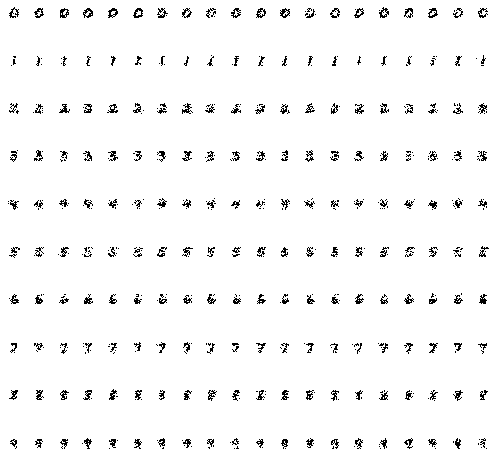

In [12]:
def P10(num_examples):

### STUDENT START ###
    bnb = BernoulliNB(alpha = 0.001)
    bnb.fit(mini_train_data,mini_train_labels)
    prob = np.exp(bnb.feature_log_prob_) #probability each pixel is 0 or 1
    digits = np.unique(Y) #unique digits
    fig, axes = plt.subplots(10, num_examples, figsize = (7,7)) #setting up 10x20 grid
    plt.rc("image",cmap="Greys")
    for i, digit in enumerate(digits):
        for j in range(20):
            random_pixels = np.random.rand(784) #generates 784 random numbers from a uniform distribution
            prob_digit = prob[i] #probability for pixels given class i
            random_diff = prob_digit - random_pixels #difference between probabilities and random numbers
            new_image = np.where(random_diff >0,1,0).reshape((28,28)) #turn differences into 0 or 1
            axes[i,j].imshow(new_image)
            axes[i,j].axis("off")
    plt.tight_layout()
    plt.show()

### STUDENT END ### 

P10(20)

ANSWER: These generated images are blurry versions of the training digit images. The comparison allows for some pixels to be misclassified as part of the image or not part of the image. For instance, if the conditional probability for a class given a certain pixel is very close to 1 then the chance of the conditional probability being larger than the randomly generated number is large so the pixel will most likely be classified as 1 which means the pixel will be white in the picture. The same, but opposite case, occurs if the conditional probability for a class given a certain pixel is close to 0. The pixel will most likely be classified as 0 so the pixel will end up being black. Classifying the pixels as either 0 or 1 means the pixels will either be black or white when graphed. Furthermore, it allows for some pixels to be misclassified as 0 or 1 (being black or white corresponds to how number is formed) due to the randomly generated numbers which causes the images to be be blurred.

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Train on the mini train set.
* Evaluate perfromance on the dev set.
* Apply a reasonable Laplace smoothing (alpha) value.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [13]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    bnb = BernoulliNB(alpha = 0.001)
    bnb.fit(mini_train_data,mini_train_labels)
    for count, row in enumerate(bnb.predict_proba(dev_data)):
        maximum = max(row) #finds the maximum posterior probability for each row which represents an image
        differences = np.abs(buckets - maximum) #finds differences between the bucket values and maximum 
        bucket_index = differences.argmin() #finds index of smallest difference to select corresponding bucket
        total[bucket_index] +=1 #increase total in bucket by 1
        class_pred = str(row.argmax()) #finds the class predicted by the maximum posterior probability
        actual_num = dev_labels[count] #finds the actual class of the image
        if class_pred == actual_num:
            correct[bucket_index]+=1#increases correct by 1 at corresponding bucket if actual and predicted class match
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =  13    accuracy = 0.385
p(pred) is 0.5000000000000 to 0.9000000000000    total =  29    accuracy = 0.310
p(pred) is 0.9000000000000 to 0.9990000000000    total =  66    accuracy = 0.485
p(pred) is 0.9990000000000 to 0.9999900000000    total =  56    accuracy = 0.464
p(pred) is 0.9999900000000 to 0.9999999000000    total =  51    accuracy = 0.667
p(pred) is 0.9999999000000 to 0.9999999990000    total =  56    accuracy = 0.786
p(pred) is 0.9999999990000 to 0.9999999999900    total =  32    accuracy = 0.781
p(pred) is 0.9999999999900 to 0.9999999999999    total =  48    accuracy = 0.771
p(pred) is 0.9999999999999 to 1.0000000000000    total = 649    accuracy = 0.941


ANSWER: This appears to be a weakly calibrated model. The classifier has a higher accuracy at a posterior probabiltiy of 0.9999999999999 than a posterior probability of 1.0. The accuracy appears to increase as the posterior probability increases. This is because Naive Bayes tends to be overconfident due to the assumption of independence - the posterior probabilities tend to be higher than the actual accuracies.